In [885]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [886]:
f_birth = pd.read_csv('data/daily-total-female-births-CA.csv', parse_dates=[0], index_col=0)

In [887]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [888]:
# get distribution and trends of the data

In [889]:
bb = f_birth.values

In [890]:
bb

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [891]:
type(bb)

numpy.ndarray

In [892]:
f_birth.size

365

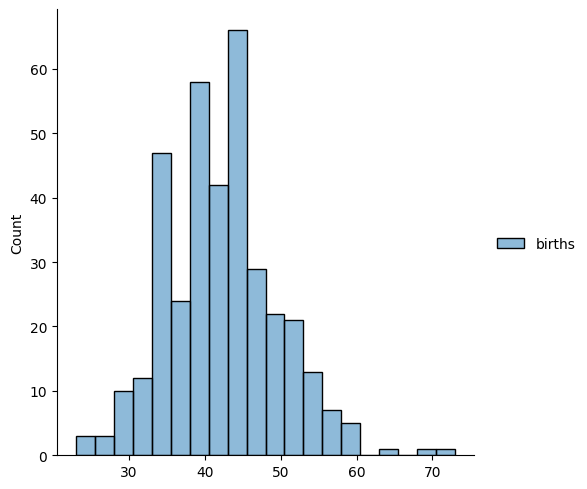

In [893]:
sns.displot(f_birth)

<Axes: xlabel='date'>

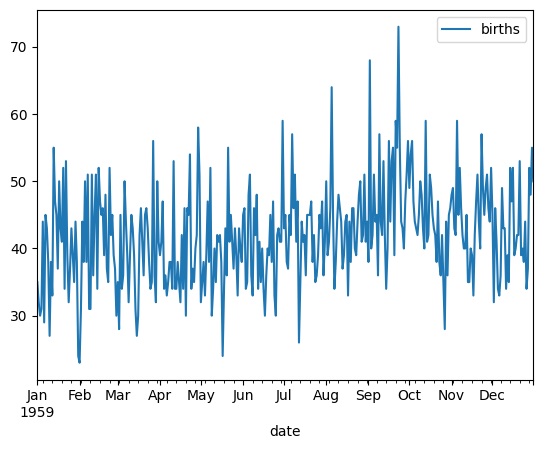

In [894]:
f_birth.plot()

In [895]:
# this is very close to stationery, which the data has no trend (has constant mean and std)

In [896]:
# use rolling on the data

In [897]:
f_birth.describe().T

,count,mean,std,min,25%,50%,75%,max
births,365.0,41.980822,7.348257,23.0,37.0,42.0,46.0,73.0


In [898]:
f_birth_mean = f_birth.births.rolling(window=20).mean()

<Axes: xlabel='date'>

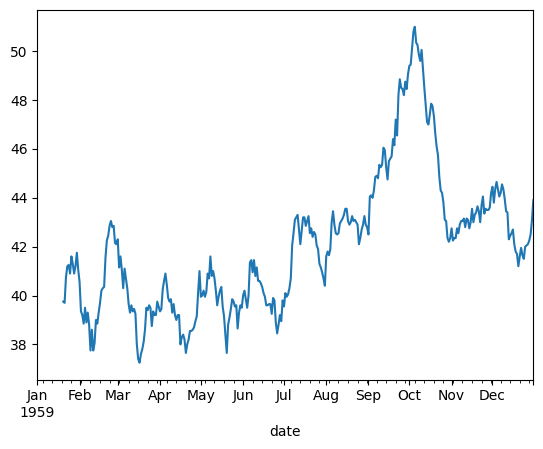

In [899]:
f_birth_mean.plot()

In [900]:
# approach 1: do prediction using baseline model (recent history is the best prediction for tomorrow)

In [901]:
value = f_birth.births

In [902]:
forecast = f_birth.births.shift(1)

In [903]:
birth_df = pd.concat([value, forecast], axis=1)

In [904]:
birth_df

,births,births
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
...,...,...
1959-12-27,37,34.0
1959-12-28,52,37.0
1959-12-29,48,52.0


In [905]:
birth_df.columns = ['actual', 'forecasted']

In [906]:
birth_df

,actual,forecasted
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
...,...,...
1959-12-27,37,34.0
1959-12-28,52,37.0
1959-12-29,48,52.0


In [907]:
# evaluate the accuracy of the model

In [908]:
from sklearn.metrics import mean_squared_error

In [909]:
np.sqrt(mean_squared_error(birth_df.actual[1:], birth_df.forecasted[1:]))

np.float64(9.177283229394606)

In [910]:
# approach 2: apply arima on the data

In [911]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

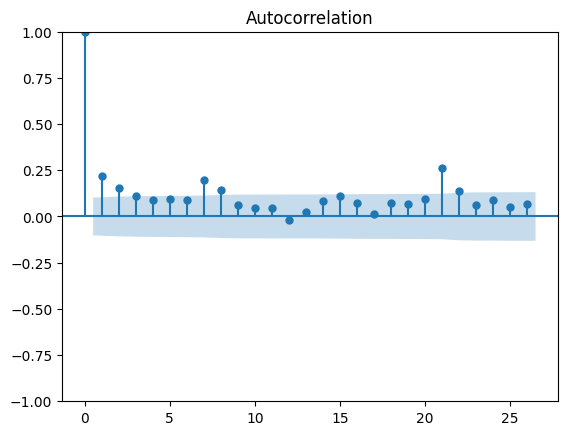

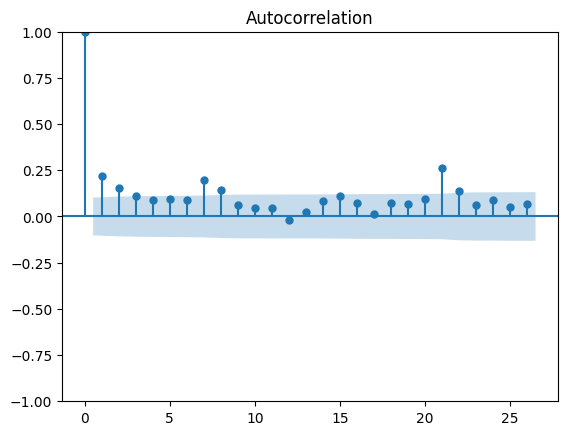

In [912]:
plot_acf(f_birth.births)

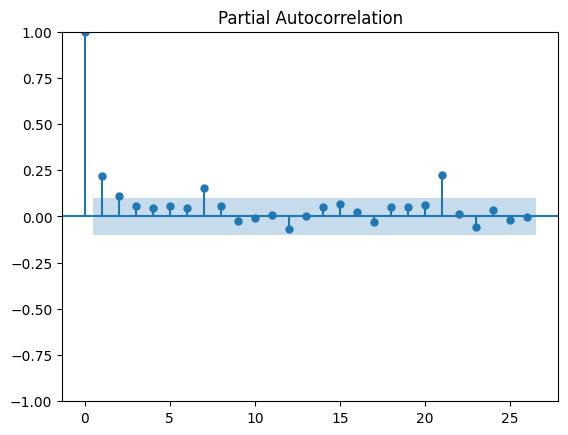

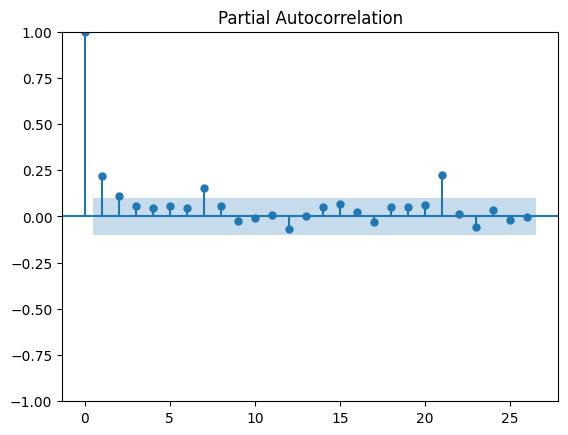

In [913]:
plot_pacf(f_birth)

In [914]:
train = f_birth[0:320]
test = f_birth[320:]

In [915]:
arima = ARIMA(train, order=(2, 1, 3))

In [916]:
model=arima.fit()

In [917]:
model.aic

np.float64(2167.8472399068664)

In [918]:
pred = model.forecast(steps=45)

In [919]:
pred

1959-11-17    42.860639
1959-11-18    43.279106
1959-11-19    43.447916
1959-11-20    43.526927
1959-11-21    43.555955
1959-11-22    43.571614
1959-11-23    43.576066
1959-11-24    43.579509
1959-11-25    43.579920
1959-11-26    43.580825
1959-11-27    43.580710
1959-11-28    43.581006
1959-11-29    43.580895
1959-11-30    43.581011
1959-12-01    43.580948
1959-12-02    43.580998
1959-12-03    43.580967
1959-12-04    43.580990
1959-12-05    43.580974
1959-12-06    43.580985
1959-12-07    43.580978
1959-12-08    43.580983
1959-12-09    43.580979
1959-12-10    43.580982
1959-12-11    43.580980
1959-12-12    43.580981
1959-12-13    43.580981
1959-12-14    43.580981
1959-12-15    43.580981
1959-12-16    43.580981
1959-12-17    43.580981
1959-12-18    43.580981
1959-12-19    43.580981
1959-12-20    43.580981
1959-12-21    43.580981
1959-12-22    43.580981
1959-12-23    43.580981
1959-12-24    43.580981
1959-12-25    43.580981
1959-12-26    43.580981
1959-12-27    43.580981
1959-12-28    43

In [920]:
np.sqrt(mean_squared_error(test, pred))

np.float64(6.53664504586193)

In [921]:
# approach 3: normalize the data

In [922]:
from sklearn.preprocessing import MinMaxScaler

In [923]:
scaler = MinMaxScaler()

In [924]:
birth_normalized = scaler.fit_transform(f_birth)

In [925]:
birth_normalized

array([[0.24],
       [0.18],
       [0.14],
       [0.16],
       [0.42],
       [0.12],
       [0.44],
       [0.4 ],
       [0.3 ],
       [0.08],
       [0.3 ],
       [0.2 ],
       [0.64],
       [0.48],
       [0.44],
       [0.28],
       [0.54],
       [0.4 ],
       [0.36],
       [0.58],
       [0.22],
       [0.6 ],
       [0.32],
       [0.18],
       [0.28],
       [0.4 ],
       [0.32],
       [0.24],
       [0.42],
       [0.3 ],
       [0.02],
       [0.  ],
       [0.16],
       [0.42],
       [0.3 ],
       [0.54],
       [0.3 ],
       [0.56],
       [0.16],
       [0.16],
       [0.56],
       [0.26],
       [0.44],
       [0.56],
       [0.22],
       [0.58],
       [0.48],
       [0.44],
       [0.46],
       [0.32],
       [0.5 ],
       [0.28],
       [0.24],
       [0.58],
       [0.38],
       [0.44],
       [0.32],
       [0.28],
       [0.14],
       [0.24],
       [0.1 ],
       [0.44],
       [0.22],
       [0.26],
       [0.54],
       [0.42],
       [0.

In [926]:
birth_normalized.size

365

In [927]:
train = birth_normalized[0:320]
test = birth_normalized[320:]

In [928]:
test.size

45

In [929]:
arima = ARIMA(train, order=(2, 1, 3))

In [930]:
model = arima.fit()

In [931]:
model.aic

np.float64(-328.0257598215261)

In [932]:
pred2 = model.forecast(steps=45)

In [933]:
pred2

array([0.3970189 , 0.40546989, 0.40879314, 0.4105825 , 0.41115602,
       0.41156997, 0.41164059, 0.4117531 , 0.4117452 , 0.41178308,
       0.41177036, 0.41178582, 0.41177761, 0.41178474, 0.41178021,
       0.4117837 , 0.41178131, 0.41178307, 0.41178184, 0.41178272,
       0.41178209, 0.41178255, 0.41178222, 0.41178245, 0.41178229,
       0.41178241, 0.41178232, 0.41178238, 0.41178234, 0.41178237,
       0.41178235, 0.41178237, 0.41178235, 0.41178236, 0.41178236,
       0.41178236, 0.41178236, 0.41178236, 0.41178236, 0.41178236,
       0.41178236, 0.41178236, 0.41178236, 0.41178236, 0.41178236])

In [934]:
np.sqrt(mean_squared_error(test,pred2))

np.float64(0.13072655989741802)

In [935]:
actual_forecast = scaler.inverse_transform(pred2.reshape(-1,1))

In [936]:
actual_forecast

array([[42.85094523],
       [43.27349438],
       [43.43965703],
       [43.5291248 ],
       [43.55780087],
       [43.5784987 ],
       [43.58202974],
       [43.58765484],
       [43.58726001],
       [43.58915401],
       [43.58851779],
       [43.58929123],
       [43.58888048],
       [43.58923703],
       [43.58901035],
       [43.58918478],
       [43.58906571],
       [43.58915325],
       [43.58909181],
       [43.5891362 ],
       [43.5891047 ],
       [43.5891273 ],
       [43.5891112 ],
       [43.58912272],
       [43.58911449],
       [43.58912037],
       [43.58911618],
       [43.58911918],
       [43.58911703],
       [43.58911856],
       [43.58911747],
       [43.58911825],
       [43.58911769],
       [43.58911809],
       [43.58911781],
       [43.58911801],
       [43.58911787],
       [43.58911797],
       [43.5891179 ],
       [43.58911795],
       [43.58911791],
       [43.58911794],
       [43.58911792],
       [43.58911793],
       [43.58911792]])

In [937]:
np.sqrt(mean_squared_error(scaler.inverse_transform(test),actual_forecast))

np.float64(6.536327994870902)

In [938]:
# approach 3 resulted less error

In [939]:
# doing basic feature engineering on the data

In [940]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [941]:
f_birth['lag1'] = f_birth.births.shift(1)
f_birth['lag2'] = f_birth.births.shift(2)
f_birth['lag3'] = f_birth.births.shift(3)

In [942]:
f_birth.head()

,births,lag1,lag2,lag3
date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN
1959-01-03,30,32.0,35.0,NaN
1959-01-04,31,30.0,32.0,35.0
1959-01-05,44,31.0,30.0,32.0


In [943]:
# moving average

In [944]:
f_birth['MA3'] = f_birth.births.rolling(window=3).mean()

In [945]:
f_birth['MA4'] = f_birth.births.rolling(window=4).mean()

In [946]:
f_birth['MAX5'] = f_birth.births.rolling(window=5).max()

In [947]:
f_birth['MIN5'] = f_birth.births.rolling(window=5).min()

In [948]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MAX5,MIN5
date,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,44.0,30.0


In [949]:
f_birth['Date'] = f_birth.index.day
f_birth['Month'] = f_birth.index.month
f_birth['Year'] = f_birth.index.year

In [950]:
f_birth.dropna(inplace=True)

In [951]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MAX5,MIN5,Date,Month,Year
date,,,,,,,,,,,
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,44.0,30.0,5,1,1959
1959-01-06,29,44.0,31.0,30.0,34.666667,33.50,44.0,29.0,6,1,1959
1959-01-07,45,29.0,44.0,31.0,39.333333,37.25,45.0,29.0,7,1,1959
1959-01-08,43,45.0,29.0,44.0,39.000000,40.25,45.0,29.0,8,1,1959
1959-01-09,38,43.0,45.0,29.0,42.000000,38.75,45.0,29.0,9,1,1959


In [952]:
# stationery time series testing

In [953]:
# approach 1: plot data

<Axes: xlabel='date'>

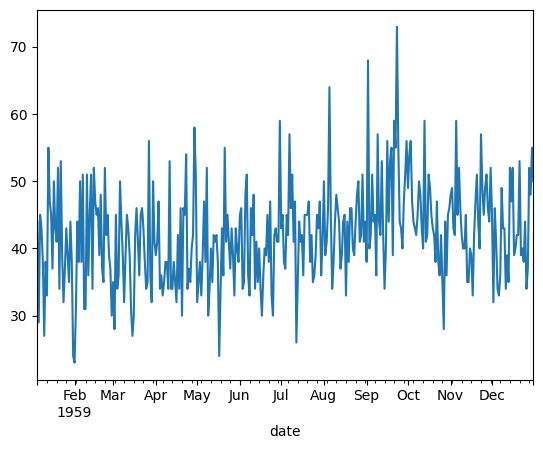

In [954]:
f_birth.births.plot()

<Axes: >

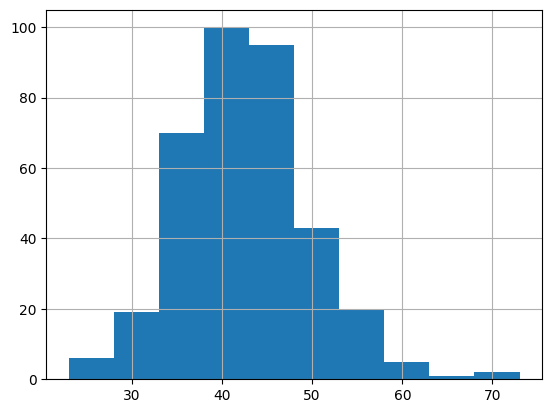

In [955]:
f_birth['births'].hist()

In [956]:
# looks normal but skewed a little to the right side

In [957]:
# approach 2: applying dickey fuller test on data

In [958]:
f_birth1 = f_birth[0:201]
f_birth2 = f_birth[201:]

In [959]:
f_birth1.births.mean()

np.float64(40.19402985074627)

In [960]:
f_birth2.births.mean()

np.float64(44.475)

In [961]:
# the means should be the same, but here they are not

In [962]:
f_birth1.births.var()

np.float64(48.33716417910448)

In [963]:
f_birth2.births.var()

np.float64(49.92389937106918)

In [964]:
# approach 3: applying augmented dickey fuller

In [965]:
from statsmodels.tsa.stattools import adfuller

In [966]:
adfuller(f_birth.births)

(np.float64(-4.832187684149896),
 np.float64(4.717774659887324e-05),
 6,
 354,
 {'1%': np.float64(-3.4489583388155194),
  '5%': np.float64(-2.869739378430086),
  '10%': np.float64(-2.5711381780459)},
 np.float64(2315.0067430524587))

In [967]:
def adfuller_test(col):
  res = adfuller(col)

  labels = ['ADF', 'p-value', 'lags used', 'no of obs used']

  for value,label in zip(res,labels):
    print('{} : {}'.format(label,value))
  if res[1] <= 0.05:
    print('strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary')
  else:
    print('weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [968]:
adfuller_test(f_birth.births)

ADF : -4.832187684149896
p-value : 4.717774659887324e-05
lags used : 6
no of obs used : 354
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [969]:
# hypertune the time series

In [970]:
f_birth = pd.read_csv('data/daily-total-female-births-CA.csv', parse_dates=[0], index_col=0)

In [971]:
p_values = range(0,8)
d_values = range(0,3)
q_values = range(0,5)

In [972]:
for p in p_values:
  for d in d_values:
    for q in q_values:
      order = (p,d,q)
      print(order)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 2, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 2, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 2, 0)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)
(4, 0, 3)
(4, 0, 4)
(4, 1, 0)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)
(4, 2, 0)
(4, 2, 1)
(4, 2, 2)
(4, 2, 3)
(4, 2, 4)
(5, 0, 0)
(5, 0, 1)
(5, 0, 2)
(5, 0, 3)
(5, 0, 4)
(5, 1, 0)
(5, 1, 1)
(5, 1, 2)
(5, 1, 3)
(5, 1, 4)
(5, 2, 0)
(5, 2, 1)
(5, 2, 2)
(5, 2, 3)
(5, 2, 4)
(6, 0, 0)
(6, 0, 1)
(6, 0, 2)
(6, 0, 3)
(6, 0, 4)
(6, 1, 0)
(6, 1, 1)
(6, 1, 2)
(6, 1, 3)
(6, 1, 4)


In [973]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [974]:
f_birth.shape

(365, 1)

In [975]:
q_values

range(0, 5)

In [1027]:
### so we are just trying to provide pairs of (p,d,q) & whichever pair will give me least error i will consider that pair,
mse = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train = np.array(f_birth[0:300])
            test = np.array(f_birth[300:])
            # print(test.shape)
            ### now we have train & test data that we can pass to our algorithm
            
            
            arima = ARIMA(train ,order=order)
            model = arima.fit()
            pred_y = model.forecast(steps=len(test))
            # print(pred_y)
            # predictions.append(pred_y)

            error = mean_squared_error(test, pred_y)
            print('MSE is {} with order {}'.format(error,order))

            mse.append(error)

MSE is 43.668628093414355 with order (0, 0, 0)
MSE is 43.93084386159538 with order (0, 0, 1)
MSE is 43.88346350364058 with order (0, 0, 2)
MSE is 43.94858696708155 with order (0, 0, 3)
MSE is 44.112331876783955 with order (0, 0, 4)
MSE is 283.5538461538463 with order (0, 1, 0)
MSE is 39.8522874233178 with order (0, 1, 1)
MSE is 39.89254842133924 with order (0, 1, 2)
MSE is 39.91455908077503 with order (0, 1, 3)
MSE is 39.91284889347817 with order (0, 1, 4)
MSE is 78042.4615384615 with order (0, 2, 0)
MSE is 308.3878096297867 with order (0, 2, 1)
MSE is 39.976732567714215 with order (0, 2, 2)
MSE is 42.53860325479799 with order (0, 2, 3)
MSE is 44.004104196298854 with order (0, 2, 4)
MSE is 43.986651527604295 with order (1, 0, 0)
MSE is 45.96930772435559 with order (1, 0, 1)
MSE is 43.45878059462098 with order (1, 0, 2)
MSE is 42.637460718001094 with order (1, 0, 3)
MSE is 43.46526081218258 with order (1, 0, 4)
MSE is 218.72158704281165 with order (1, 1, 0)
MSE is 39.92206328109632 with

In [1030]:
min(mse)

np.float64(39.55995091258294)

In [1031]:
# MSE is 39.55995091258294 with order (5, 1, 4) -> this is the lowest/best params

'MSE is 39.55995091258294 with order (5, 1, 4)'